In [14]:
import pandas as pd

# Load the dataset
file_path = '/content/DoctorDatasetcsvfile.csv'  # Replace with your file path
raw_data = pd.read_csv(file_path, sep=';')

# Preview the data
print("Dataset Preview:")
print(raw_data.head())

# Dataset Information
print("Dataset Info:")
print(raw_data.info())
output_file_path = 'formatted_Doctor_data.csv'
raw_data.to_csv(output_file_path, index=False)
print(f"Formatted data saved to {output_file_path}")



Dataset Preview:
     Doctor name ,specialization,Hospital ,district 
0  Dr. Kumuduni Amarasinghe Muthaliff,Addiction P...
1  Dr. Chathurika Weerasooriya,Anxiety reduction ...
2  Dr. Nimal Liyanage,Applied Psychologist ,Medih...
3  Dr. Nimal Liyanage,Applied Psychologist ,Winse...
4  Dr. Lasantha Wijesekara,Applied Psychologist ,...
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 1 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Doctor name ,specialization,Hospital ,district   296 non-null    object
dtypes: object(1)
memory usage: 2.4+ KB
None
Formatted data saved to formatted_Doctor_data.csv


In [15]:
# Remove unnecessary characters
raw_data = raw_data.replace('"', '', regex=True)

# Check for missing values
missing_values = raw_data.isnull().sum()
print("Missing Values:\n", missing_values)

# Drop rows with missing values (if any exist)
raw_data = raw_data.dropna()

print("Cleaned Dataset Preview:")
print(raw_data.head())


Missing Values:
 Doctor name ,specialization,Hospital ,district     0
dtype: int64
Cleaned Dataset Preview:
     Doctor name ,specialization,Hospital ,district 
0  Dr. Kumuduni Amarasinghe Muthaliff,Addiction P...
1  Dr. Chathurika Weerasooriya,Anxiety reduction ...
2  Dr. Nimal Liyanage,Applied Psychologist ,Medih...
3  Dr. Nimal Liyanage,Applied Psychologist ,Winse...
4  Dr. Lasantha Wijesekara,Applied Psychologist ,...


In [16]:
print(raw_data.columns)


Index(['Doctor name ,specialization,Hospital ,district '], dtype='object')


In [12]:
raw_data.columns = raw_data.columns.str.strip()


In [17]:
print(raw_data.columns)


Index(['Doctor name ,specialization,Hospital ,district '], dtype='object')


In [19]:
# Strip leading/trailing spaces from column names
raw_data.columns = raw_data.columns.str.strip()

# Now, access the column with the correct name
raw_data[['Doctor Name', 'Specialization', 'Hospital', 'District']] = raw_data[
    'Doctor name ,specialization,Hospital ,district'
].str.split(',', expand=True)

# Drop the original combined column
raw_data = raw_data.drop(columns=['Doctor name ,specialization,Hospital ,district'])

# Preview the cleaned data
print("Cleaned and Split Dataset Preview:")
print(raw_data.head())

Cleaned and Split Dataset Preview:
                          Doctor Name             Specialization  \
0  Dr. Kumuduni Amarasinghe Muthaliff     Addiction Professional   
1         Dr. Chathurika Weerasooriya  Anxiety reduction therapy   
2                  Dr. Nimal Liyanage      Applied Psychologist    
3                  Dr. Nimal Liyanage      Applied Psychologist    
4             Dr. Lasantha Wijesekara      Applied Psychologist    

                     Hospital       District  
0   Nawinna Medicare Hospital     Maharagama  
1  Blue cross medical Centre      Rajagiriya  
2           Medihelp Hospital  Mount Lavinia  
3           Winsetha Hospital     Colombo 10  
4           Winsetha Hospital     Colombo 10  


In [20]:
raw_data = raw_data.drop_duplicates()
print("Dataset after removing duplicates:")
print(raw_data.head())


Dataset after removing duplicates:
                          Doctor Name             Specialization  \
0  Dr. Kumuduni Amarasinghe Muthaliff     Addiction Professional   
1         Dr. Chathurika Weerasooriya  Anxiety reduction therapy   
2                  Dr. Nimal Liyanage      Applied Psychologist    
3                  Dr. Nimal Liyanage      Applied Psychologist    
4             Dr. Lasantha Wijesekara      Applied Psychologist    

                     Hospital       District  
0   Nawinna Medicare Hospital     Maharagama  
1  Blue cross medical Centre      Rajagiriya  
2           Medihelp Hospital  Mount Lavinia  
3           Winsetha Hospital     Colombo 10  
4           Winsetha Hospital     Colombo 10  


In [21]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
raw_data['Specialization'] = label_encoder.fit_transform(raw_data['Specialization'])
raw_data['Hospital'] = label_encoder.fit_transform(raw_data['Hospital'])
raw_data['District'] = label_encoder.fit_transform(raw_data['District'])

# Preview the dataset after encoding
print("Encoded Dataset Preview:")
print(raw_data.head())


Encoded Dataset Preview:
                          Doctor Name  Specialization  Hospital  District
0  Dr. Kumuduni Amarasinghe Muthaliff               0        71        41
1         Dr. Chathurika Weerasooriya               1        25        54
2                  Dr. Nimal Liyanage               2        57        46
3                  Dr. Nimal Liyanage               2        98        17
4             Dr. Lasantha Wijesekara               2        98        17


In [22]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for PCA (excluding 'Doctor Name')
features = raw_data.drop(columns=['Doctor Name'])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

# Convert back to a DataFrame for easier interpretation
scaled_df = pd.DataFrame(scaled_data, columns=features.columns)
print("Standardized Data Preview:")
print(scaled_df.head())


Standardized Data Preview:
   Specialization  Hospital  District
0       -2.737177  0.887542  0.616319
1       -2.601054 -0.703816  1.396193
2       -2.464931  0.403216  0.916271
3       -2.464931  1.821601 -0.823448
4       -2.464931  1.821601 -0.823448


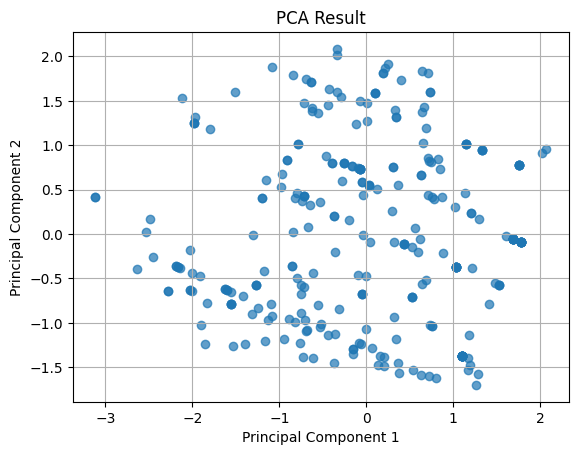

In [24]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming scaled_df is your standardized data
pca = PCA(n_components=2)  # Reduce to 2 principal components
principalComponents = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data = principalComponents,
columns = ['Principal Component 1', 'Principal Component 2'])


plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], alpha=0.7)
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [25]:
print(pca.components_)


[[ 0.65361084 -0.64747429  0.39187997]
 [-0.25653835  0.29759911  0.91957754]]


In [26]:
print("Original features:", list(features.columns))
print("Number of original features:", len(features.columns))


Original features: ['Specialization', 'Hospital', 'District']
Number of original features: 3


In [27]:
print("Number of principal components:", pca.n_components_)


Number of principal components: 2


In [28]:
import pandas as pd

# Get the PCA loadings
loadings = pd.DataFrame(pca.components_, columns=features.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])

print("PCA Loadings:")
print(loadings)


PCA Loadings:
     Specialization  Hospital  District
PC1        0.653611 -0.647474  0.391880
PC2       -0.256538  0.297599  0.919578
